In [157]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [ ]:
from __future__ import division
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [162]:
df = pd.read_csv("D:\WEBSITE\german_credit.csv")

# Exploratory Data Analysis

The "German Credit" dataset has 21 variables and 1000 observations. The objective of analyzing this particular data set is to 
help the bank classify a good customer from a defaulter. The given data contains only 3 numeric variables and 16 categorical 
predictors with the response variable, "Creditability" encoded as '0' for "Defaulters" and 1 for "Good customers". A preliminary 
analysis of each predictor vs. the response variable is peformed in order to identify important variables that would help us 
classify our data.

In [28]:
df.head(5)

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [175]:
df.columns

Index([u'Creditability', u'Account Balance', u'Duration of Credit (month)',
       u'Payment Status of Previous Credit', u'Purpose', u'Credit Amount',
       u'Value Savings/Stocks', u'Length of current employment',
       u'Instalment per cent', u'Sex & Marital Status', u'Guarantors',
       u'Duration in Current address', u'Most valuable available asset',
       u'Age (years)', u'Concurrent Credits', u'Type of apartment',
       u'No of Credits at this Bank', u'Occupation', u'No of dependents',
       u'Telephone', u'Foreign Worker'],
      dtype='object')

## Distribution of Response Variable

The dataset has 300 defaulters and 700 good customers.

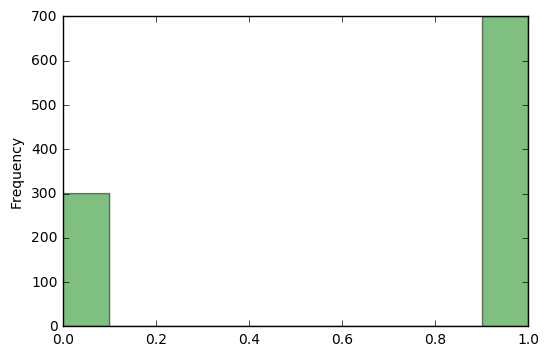

In [114]:
plt.figure()
df['Creditability'].plot(kind = 'hist',color = 'g',alpha = 0.5) 

## Effect of Account Balance on Response Variable

In [184]:
df['Account Balance'].unique()

array([1, 2, 4, 3], dtype=int64)

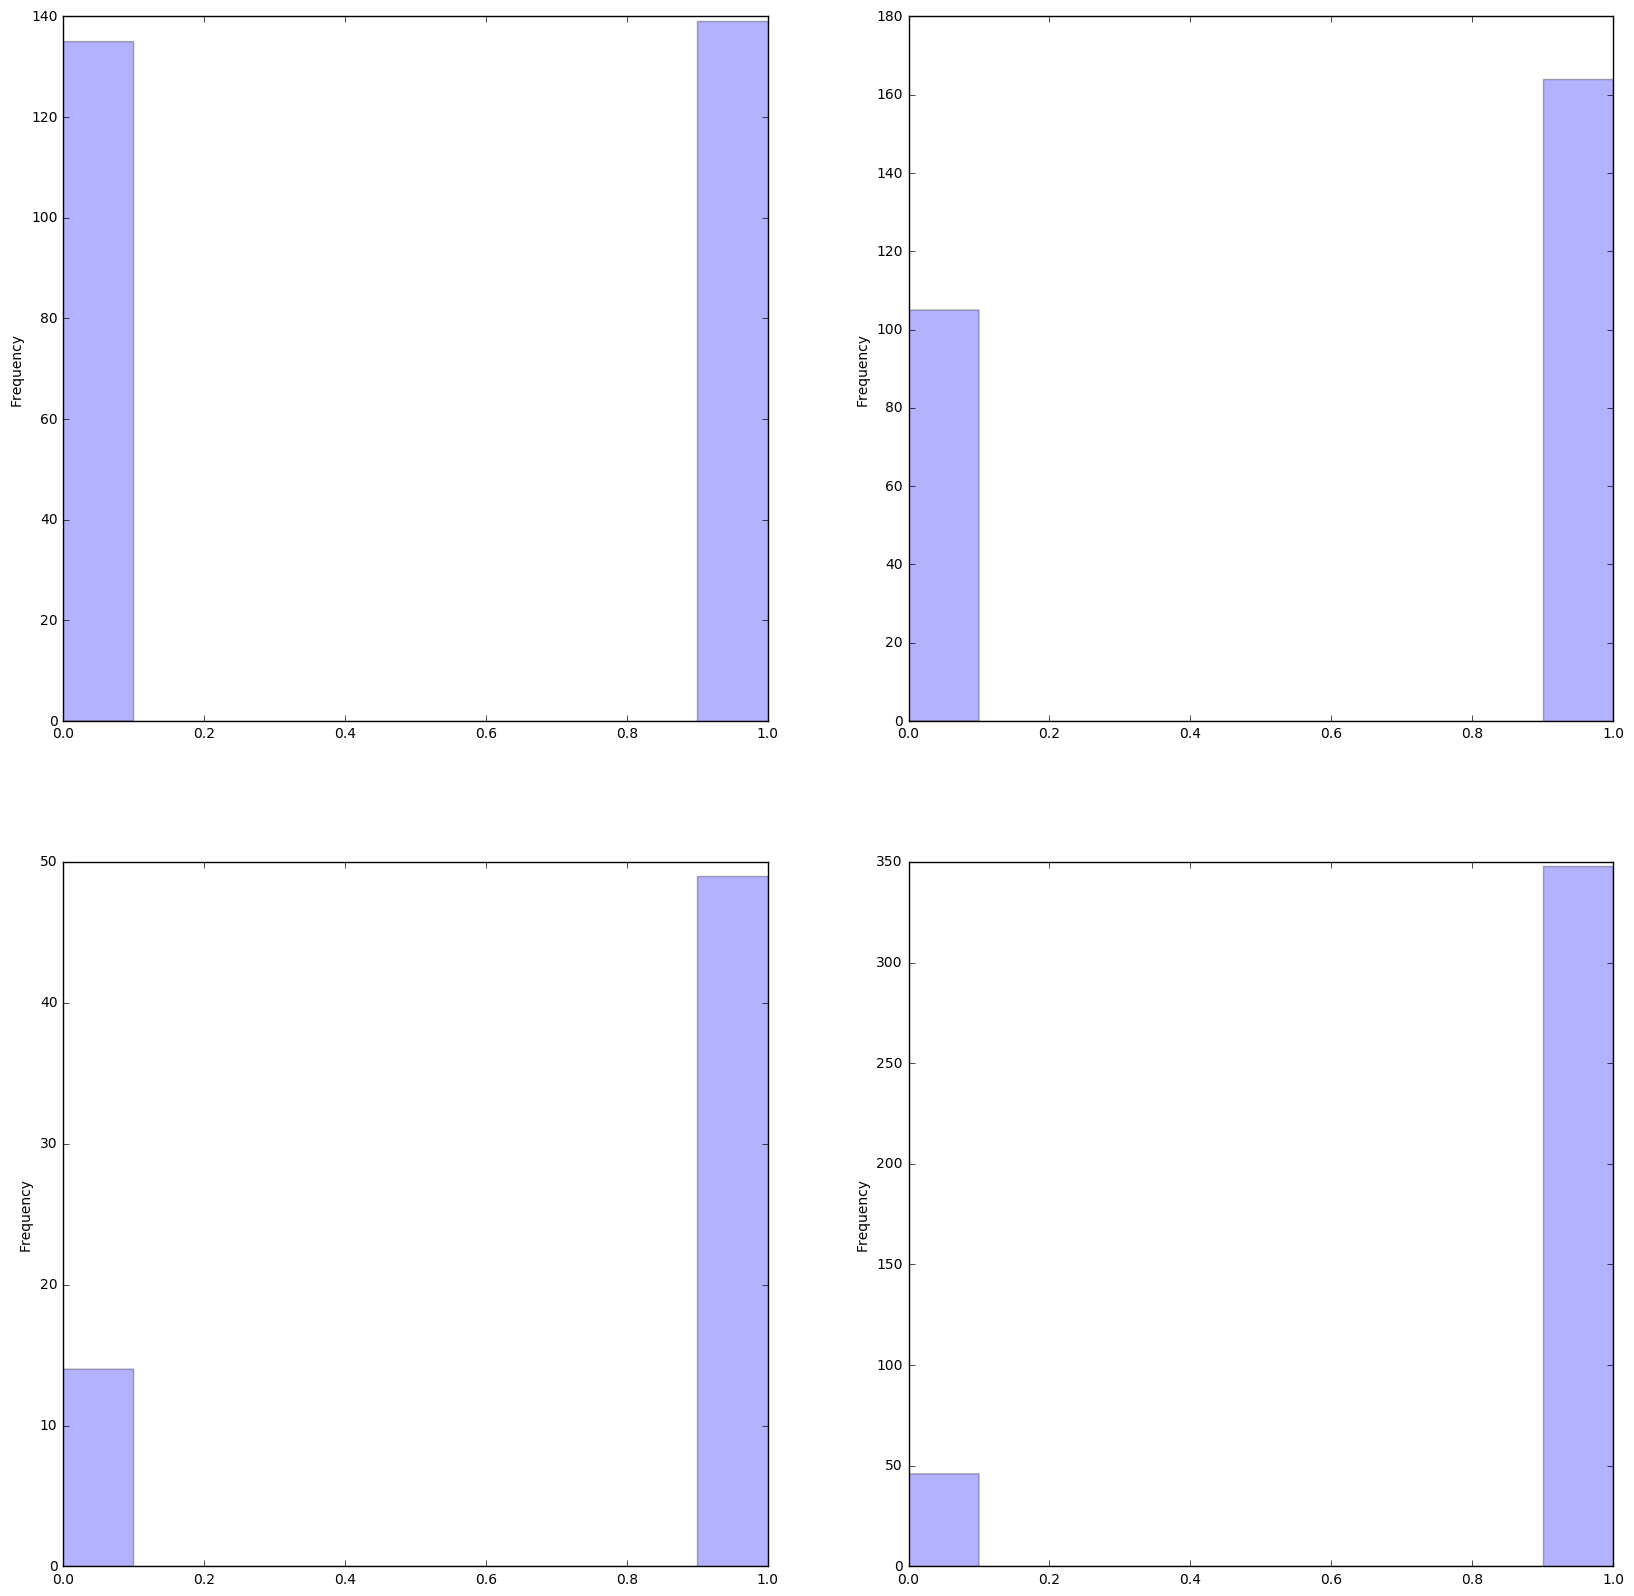

In [159]:
fig,ax =plt.subplots(2,2,figsize=(20,20))

df[df['Account Balance']==1]['Creditability'].plot(kind = 'hist',ax=ax[0,0],label ='Account Balance(1)',alpha = 0.3)
df[df['Account Balance']==2]['Creditability'].plot(kind = 'hist',ax=ax[0,1],label ='Account Balance(2)',alpha = 0.3)
df[df['Account Balance']==3]['Creditability'].plot(kind = 'hist',ax=ax[1,0],label ='Account Balance(3)',alpha = 0.3)
df[df['Account Balance']==4]['Creditability'].plot(kind = 'hist',ax=ax[1,1],label ='Account Balance(4)',alpha = 0.3)

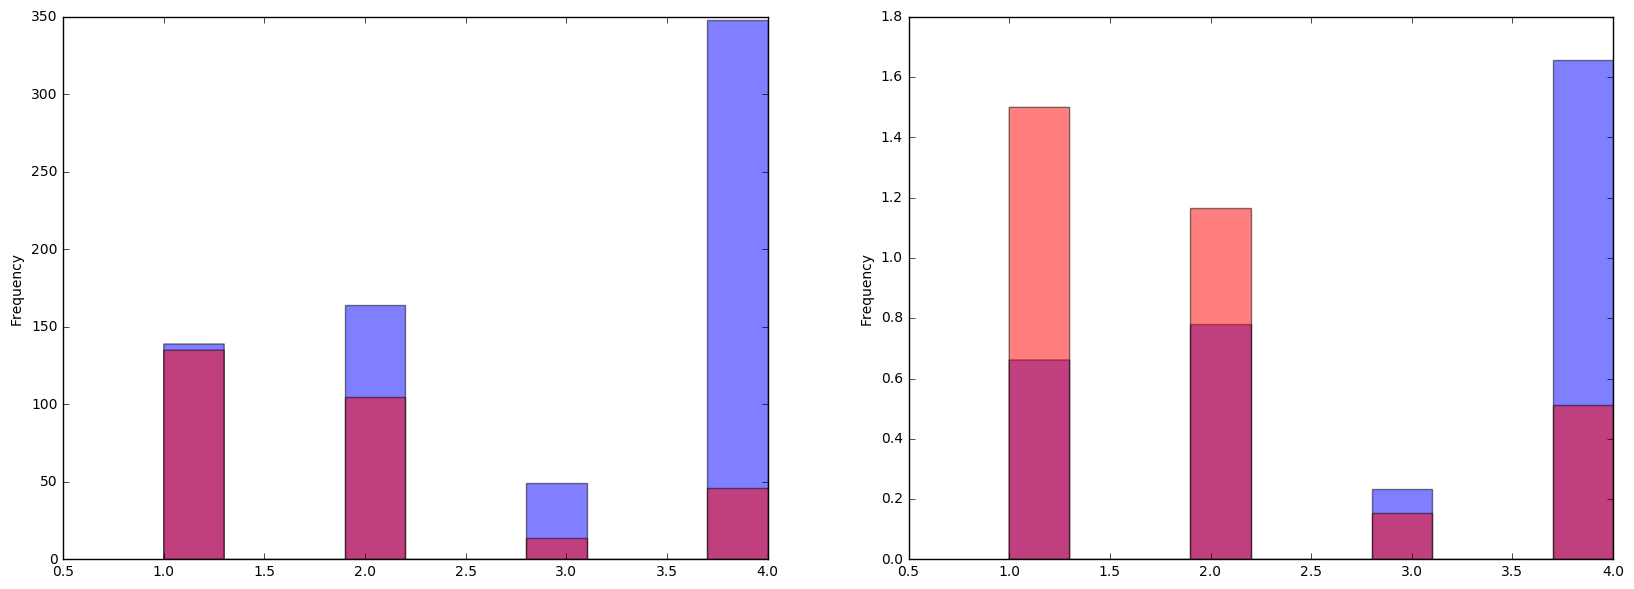

In [160]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Account Balance'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Account Balance'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.5)
df[df['Creditability']==1]['Account Balance'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Account Balance'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.5)

## Analysis of Numeric Independent Variables against Response Variable

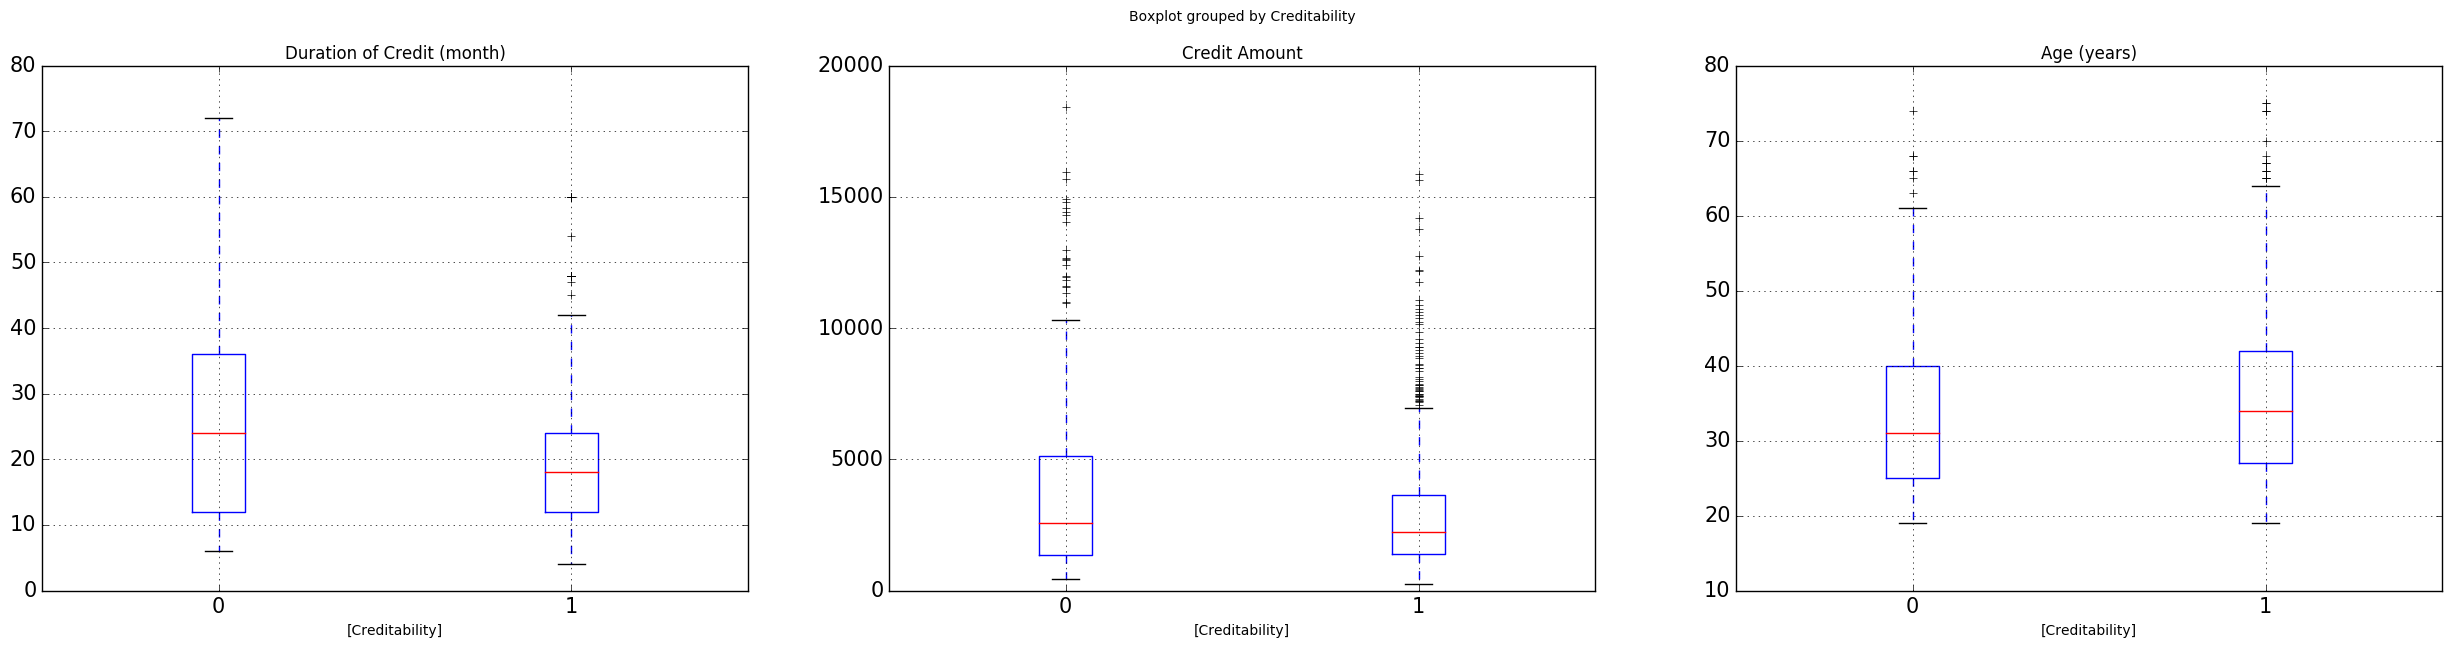

In [148]:
fig,ax=plt.subplots(1,3,figsize=(30,7))
bp1 = df.boxplot(column = ['Duration of Credit (month)'],  by = ['Creditability'], ax = ax[0],fontsize = 15)
bp2 = df.boxplot(column = ['Credit Amount'],  by = ['Creditability'], ax = ax[1],fontsize = 15)
bp3 = df.boxplot(column = ['Age (years)'],  by = ['Creditability'], ax = ax[2], fontsize = 15)
# ax[2].set_ylabel("Age in years",fontsize = 15)
# ax[0].set_ylabel("Credit Amount",fontsize = 15)
# ax[1].set_ylabel("",fontsize = 15)
ax[0].tick_params(axis='both',labelsize=15)
ax[1].tick_params(axis='both',labelsize=15)
ax[2].tick_params(axis='both',labelsize=15)

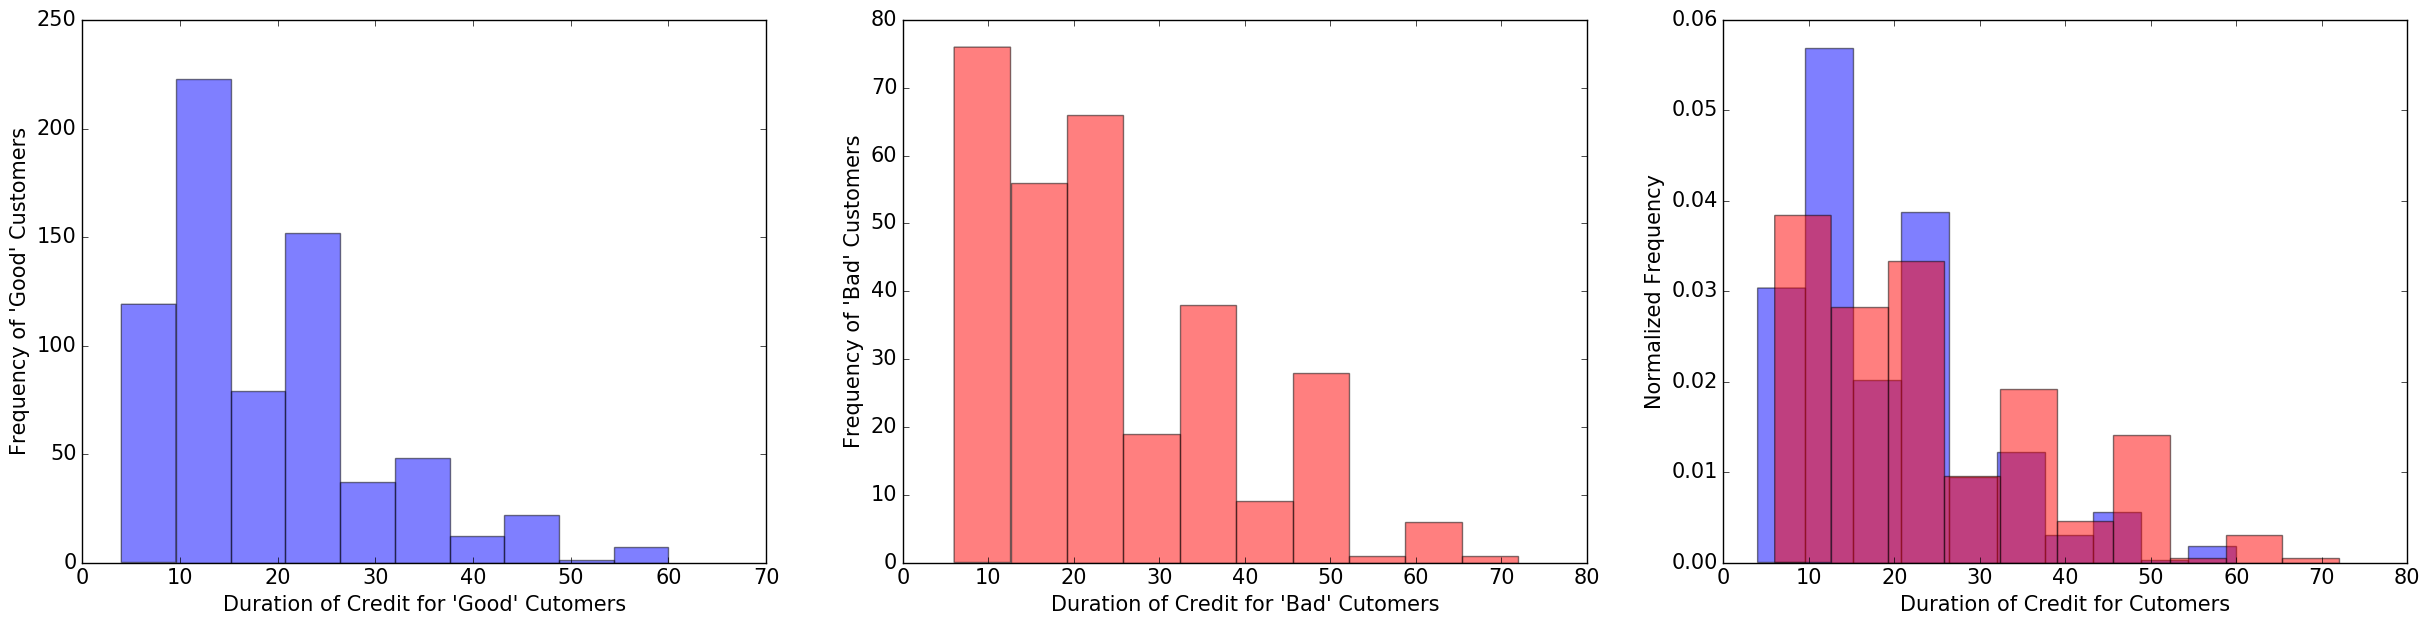

In [134]:
fig,ax = plt.subplots(1,3,figsize = (30,7))
df[df['Creditability']==1]['Duration of Credit (month)'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Duration of Credit (month)'].plot(kind = 'hist',ax=ax[1],label="0",color='r',alpha=0.5)
df[df['Creditability']==1]['Duration of Credit (month)'].plot(kind = 'hist',normed=1,ax=ax[2],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Duration of Credit (month)'].plot(kind = 'hist',normed=1,ax=ax[2],label="0",color='r',alpha=0.5)
ax[2].set_ylabel("Normalized Frequency",fontsize = 15)
ax[0].set_ylabel("Frequency of 'Good' Customers",fontsize = 15)
ax[1].set_ylabel("Frequency of 'Bad' Customers",fontsize = 15)
ax[0].set_xlabel("Duration of Credit for 'Good' Cutomers",fontsize = 15)
ax[1].set_xlabel("Duration of Credit for 'Bad' Cutomers",fontsize = 15)
ax[2].set_xlabel("Duration of Credit for Cutomers",fontsize = 15)
ax[0].tick_params(axis='both',labelsize=15)
ax[1].tick_params(axis='both',labelsize=15)
ax[2].tick_params(axis='both',labelsize=15)

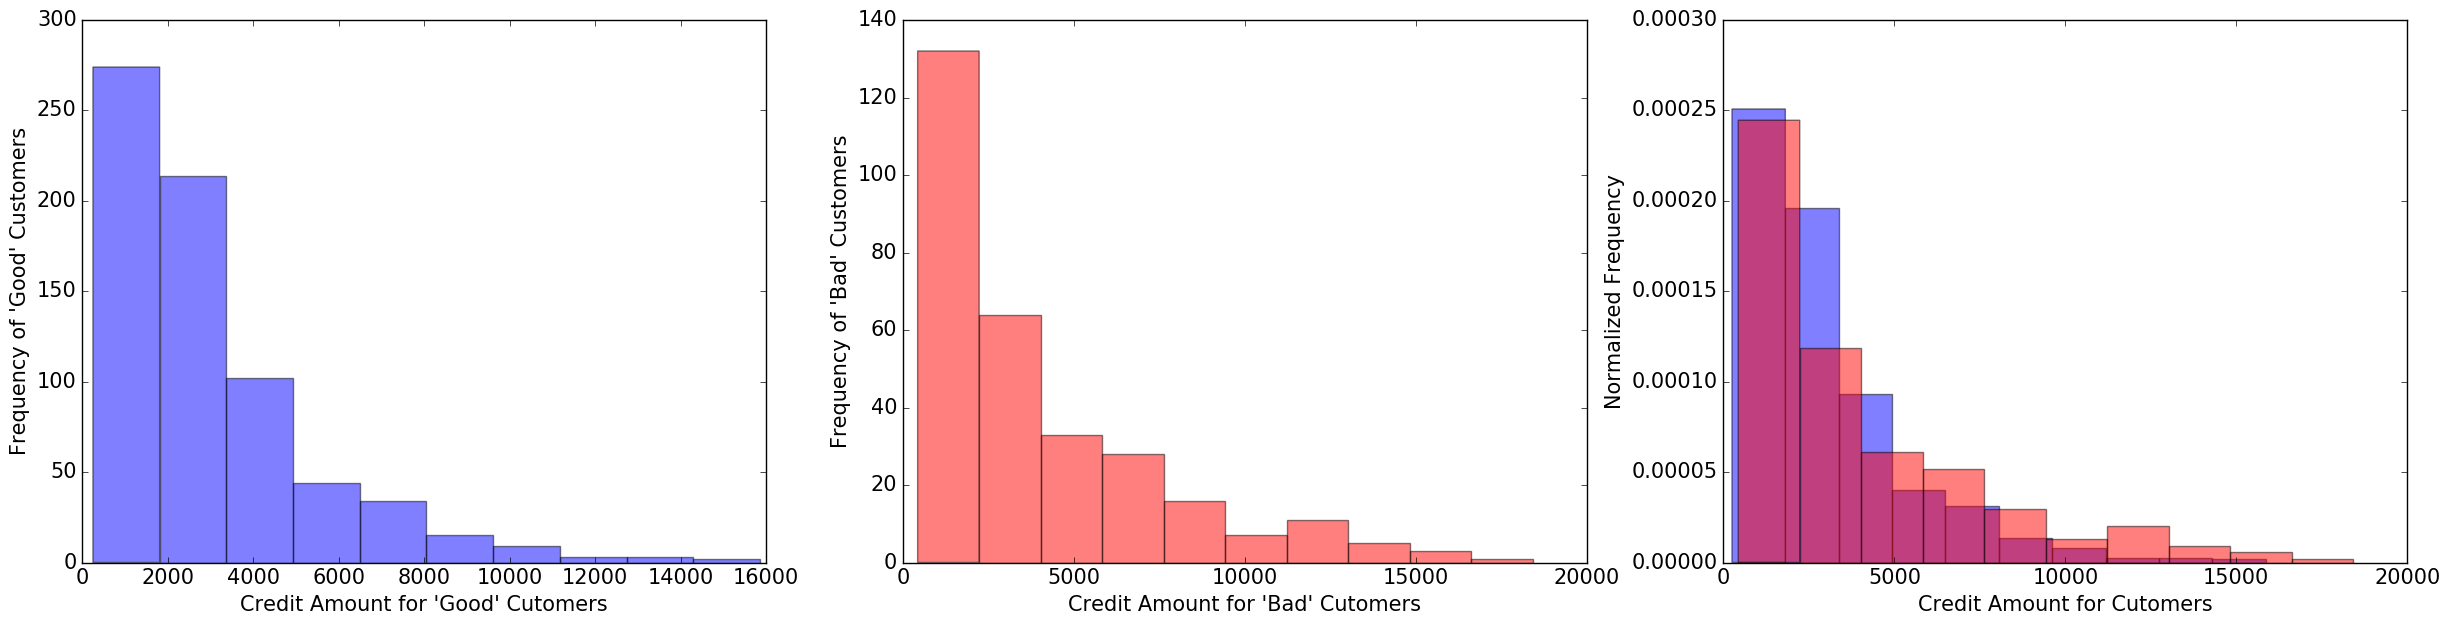

In [136]:
fig,ax = plt.subplots(1,3,figsize = (30,7))
df[df['Creditability']==1]['Credit Amount'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Credit Amount'].plot(kind = 'hist',ax=ax[1],label="0",color='r',alpha=0.5)
df[df['Creditability']==1]['Credit Amount'].plot(kind = 'hist',normed=1,ax=ax[2],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Credit Amount'].plot(kind = 'hist',normed=1,ax=ax[2],label="0",color='r',alpha=0.5)
ax[2].set_ylabel("Normalized Frequency",fontsize = 15)
ax[0].set_ylabel("Frequency of 'Good' Customers",fontsize = 15)
ax[1].set_ylabel("Frequency of 'Bad' Customers",fontsize = 15)
ax[0].set_xlabel("Credit Amount for 'Good' Cutomers",fontsize = 15)
ax[1].set_xlabel("Credit Amount for 'Bad' Cutomers",fontsize = 15)
ax[2].set_xlabel("Credit Amount for Cutomers",fontsize = 15)
ax[0].tick_params(axis='both',labelsize=15)
ax[1].tick_params(axis='both',labelsize=15)
ax[2].tick_params(axis='both',labelsize=15)

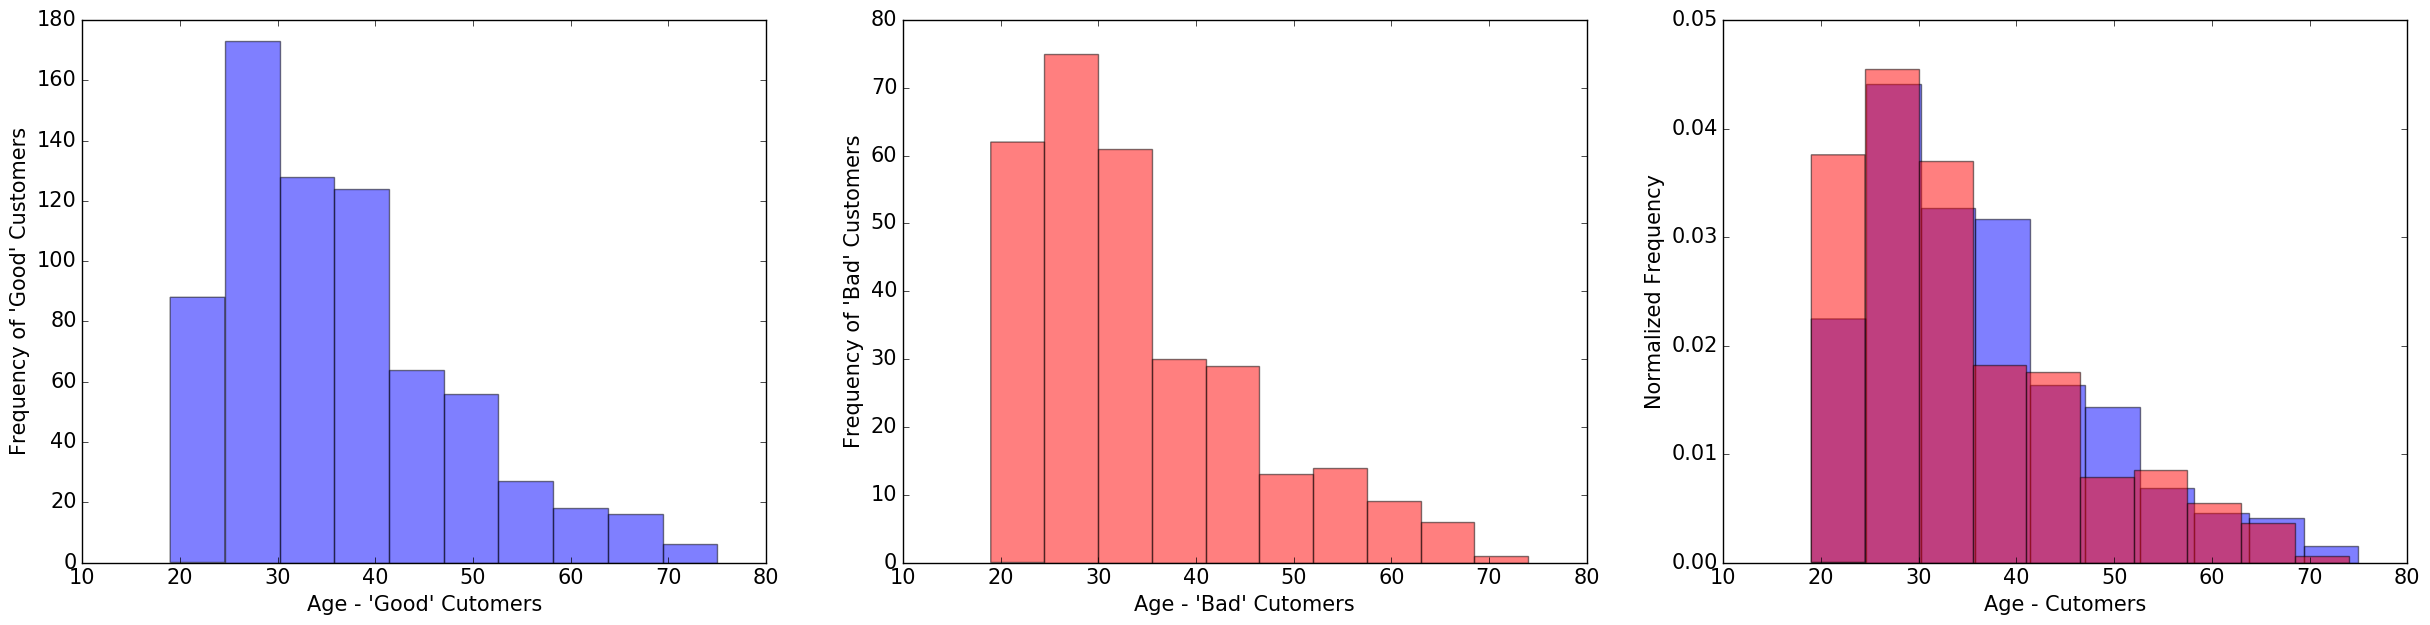

In [161]:
fig,ax = plt.subplots(1,3,figsize = (30,7))
df[df['Creditability']==1]['Age (years)'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Age (years)'].plot(kind = 'hist',ax=ax[1],label="0",color='r',alpha=0.5)
df[df['Creditability']==1]['Age (years)'].plot(kind = 'hist',normed=1,ax=ax[2],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Age (years)'].plot(kind = 'hist',normed=1,ax=ax[2],label="0",color='r',alpha=0.5)
ax[2].set_ylabel("Normalized Frequency",fontsize = 15)
ax[0].set_ylabel("Frequency of 'Good' Customers",fontsize = 15)
ax[1].set_ylabel("Frequency of 'Bad' Customers",fontsize = 15)
ax[0].set_xlabel("Age - 'Good' Cutomers",fontsize = 15)
ax[1].set_xlabel("Age - 'Bad' Cutomers",fontsize = 15)
ax[2].set_xlabel("Age - Cutomers",fontsize = 15)
ax[0].tick_params(axis='both',labelsize=15)
ax[1].tick_params(axis='both',labelsize=15)
ax[2].tick_params(axis='both',labelsize=15)

## Effect of "Payment Status of Previous Credit" on Response

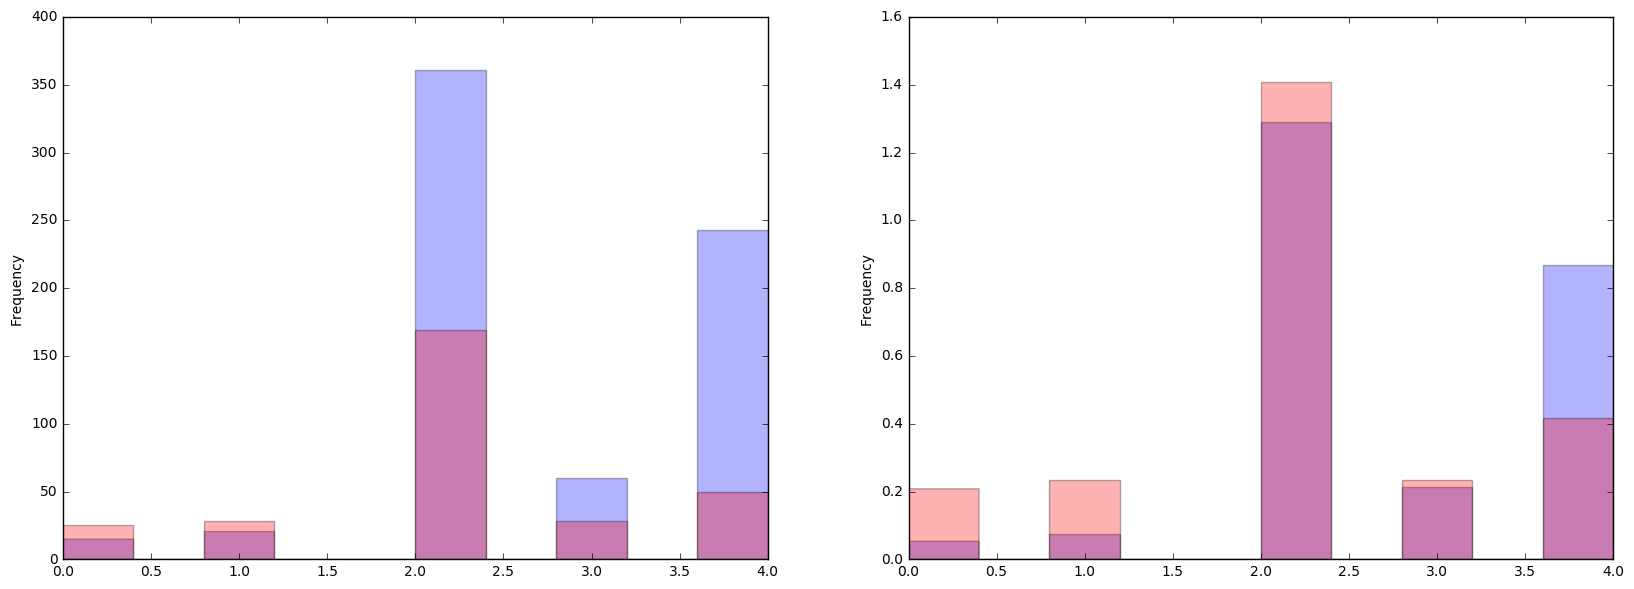

In [164]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Payment Status of Previous Credit'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Payment Status of Previous Credit'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Payment Status of Previous Credit'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Payment Status of Previous Credit'].plot(kind = 'hist',ax=ax[1],normed=1,label="0",color='r',alpha=0.3)

## Effect of "Purpose" on Response

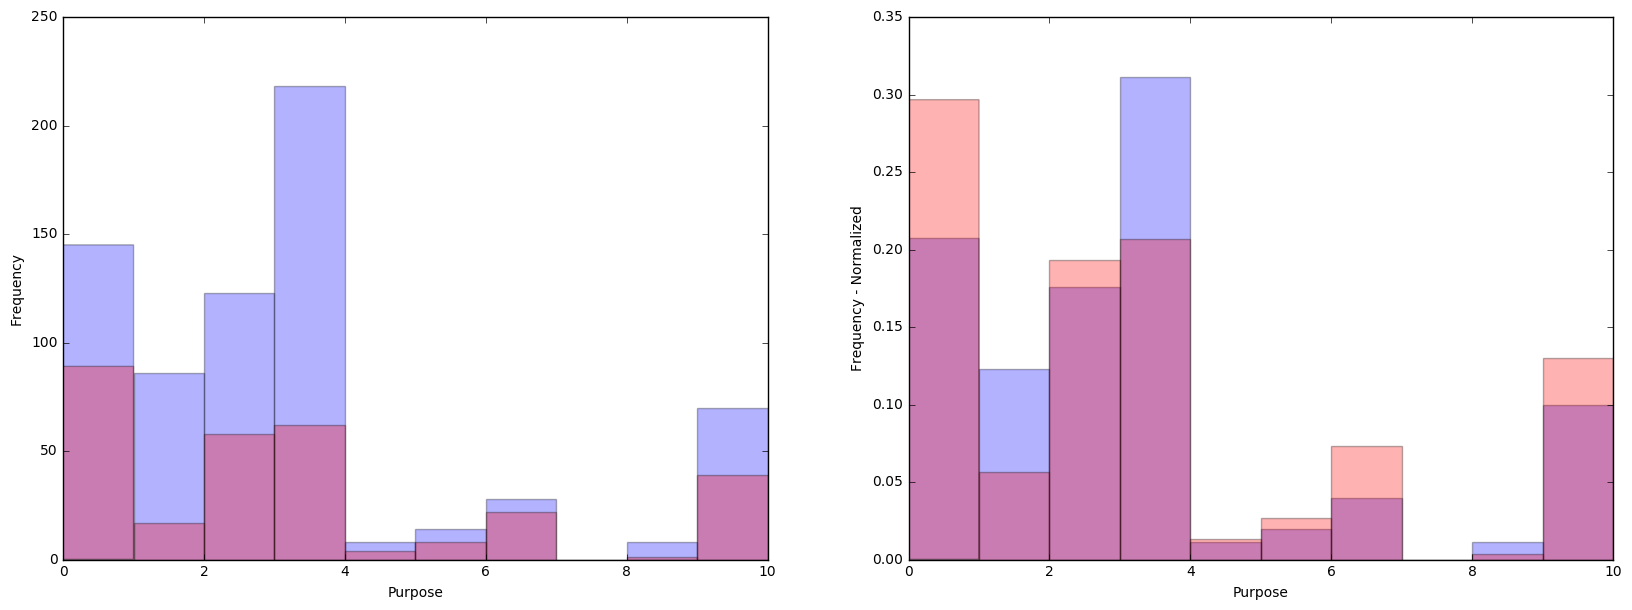

In [167]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Purpose'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Purpose'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Purpose'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Purpose'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel('Purpose')
ax[1].set_xlabel('Purpose')
ax[1].set_ylabel('Frequency - Normalized')


## Effect of "Value Savings/Stocks" on Response

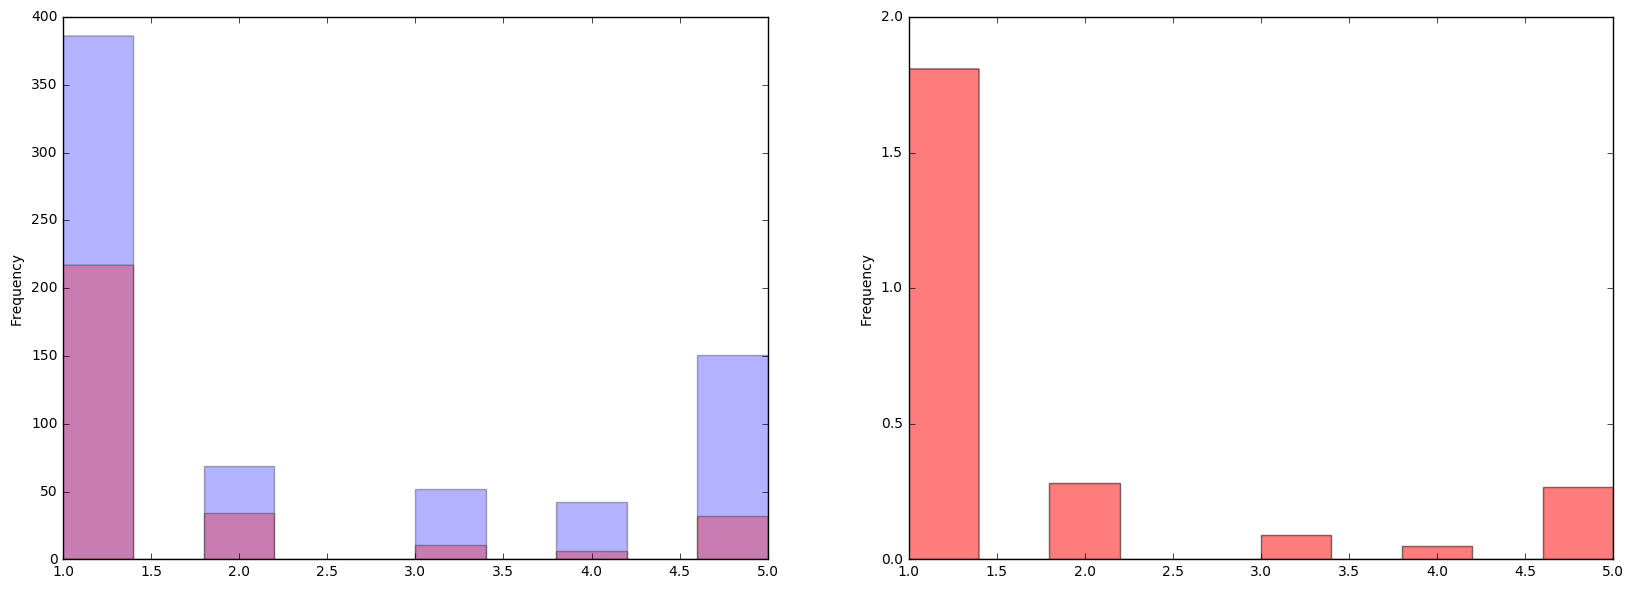

In [169]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Value Savings/Stocks'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Value Savings/Stocks'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==0]['Value Savings/Stocks'].plot(kind = 'hist',ax=ax[1],normed=1,label="0",color='r',alpha=0.3)
df[df['Creditability']==0]['Value Savings/Stocks'].plot(kind = 'hist',ax=ax[1],normed=1,label="0",color='r',alpha=0.3)

## Effect of "Length of current Employment" on Response

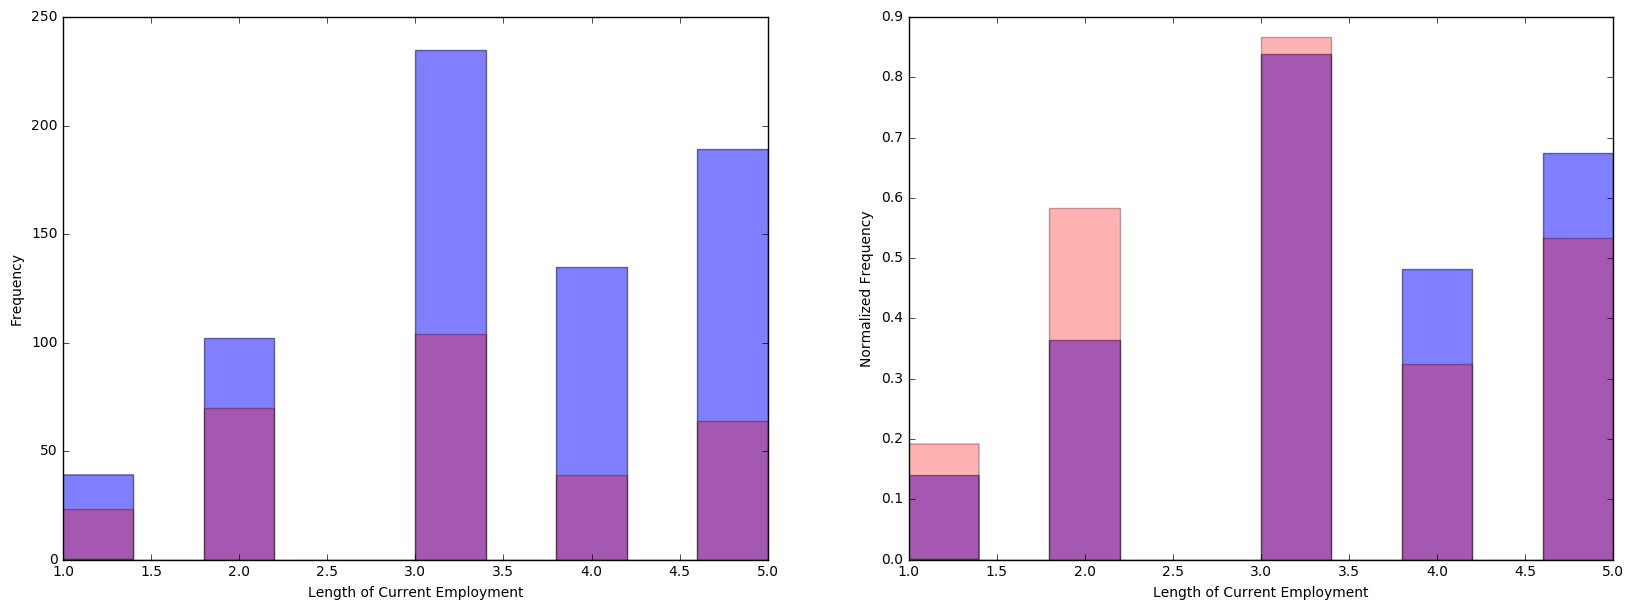

In [170]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Length of current employment'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Length of current employment'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Length of current employment'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.5)
df[df['Creditability']==0]['Length of current employment'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Length of Current Employment")
ax[1].set_xlabel("Length of Current Employment")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "Instalment per cent" on Response

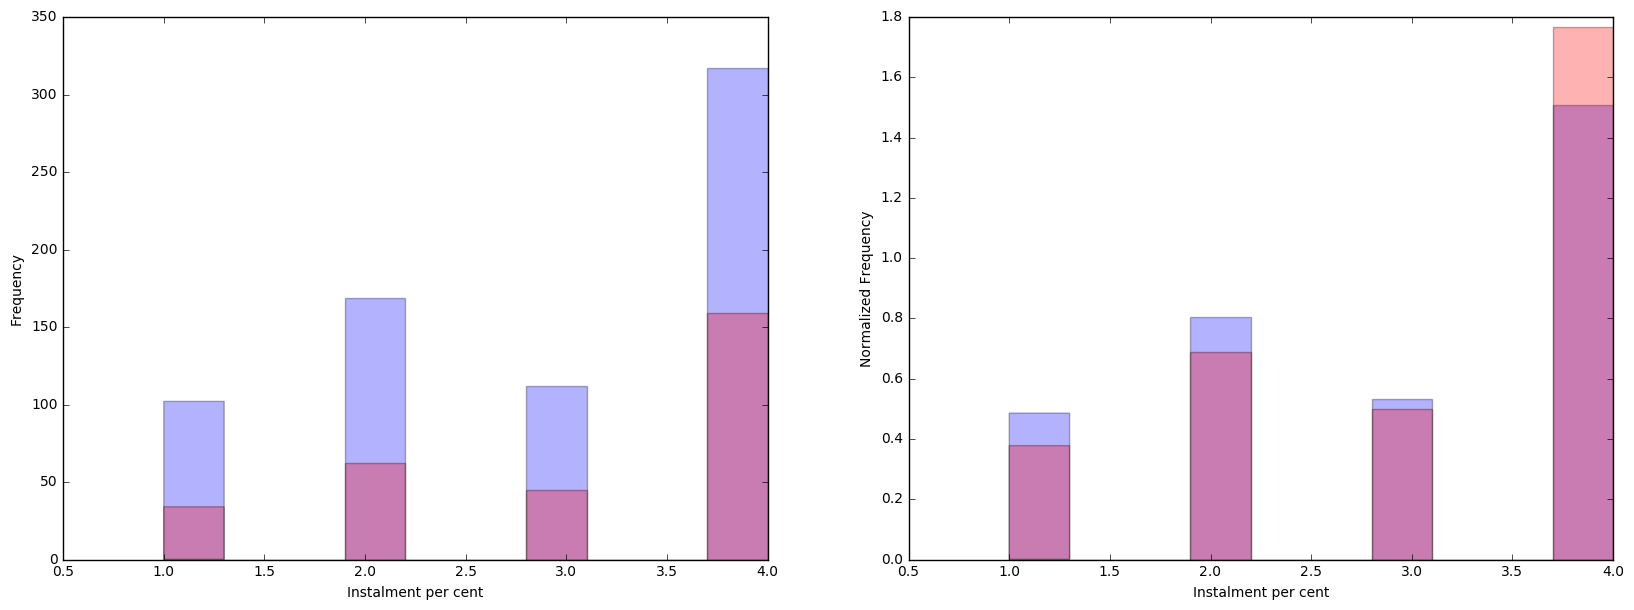

In [171]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Instalment per cent'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Instalment per cent'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Instalment per cent'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Instalment per cent'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Instalment per cent")
ax[1].set_xlabel("Instalment per cent")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "Sex & Marital Status" on Response

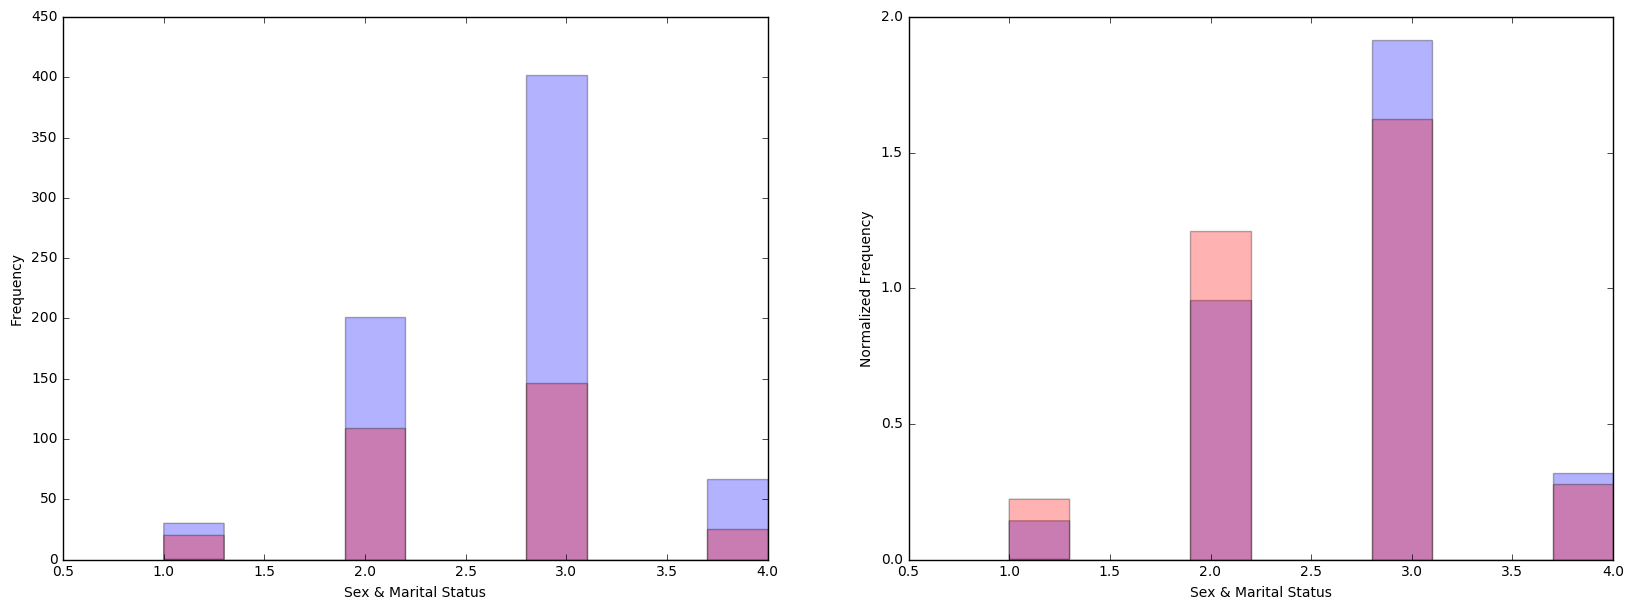

In [180]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Sex & Marital Status'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Sex & Marital Status'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Sex & Marital Status'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Sex & Marital Status'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Sex & Marital Status")
ax[1].set_xlabel("Sex & Marital Status")
ax[1].set_ylabel("Normalized Frequency")

## Effect of "Guarantors" on Response

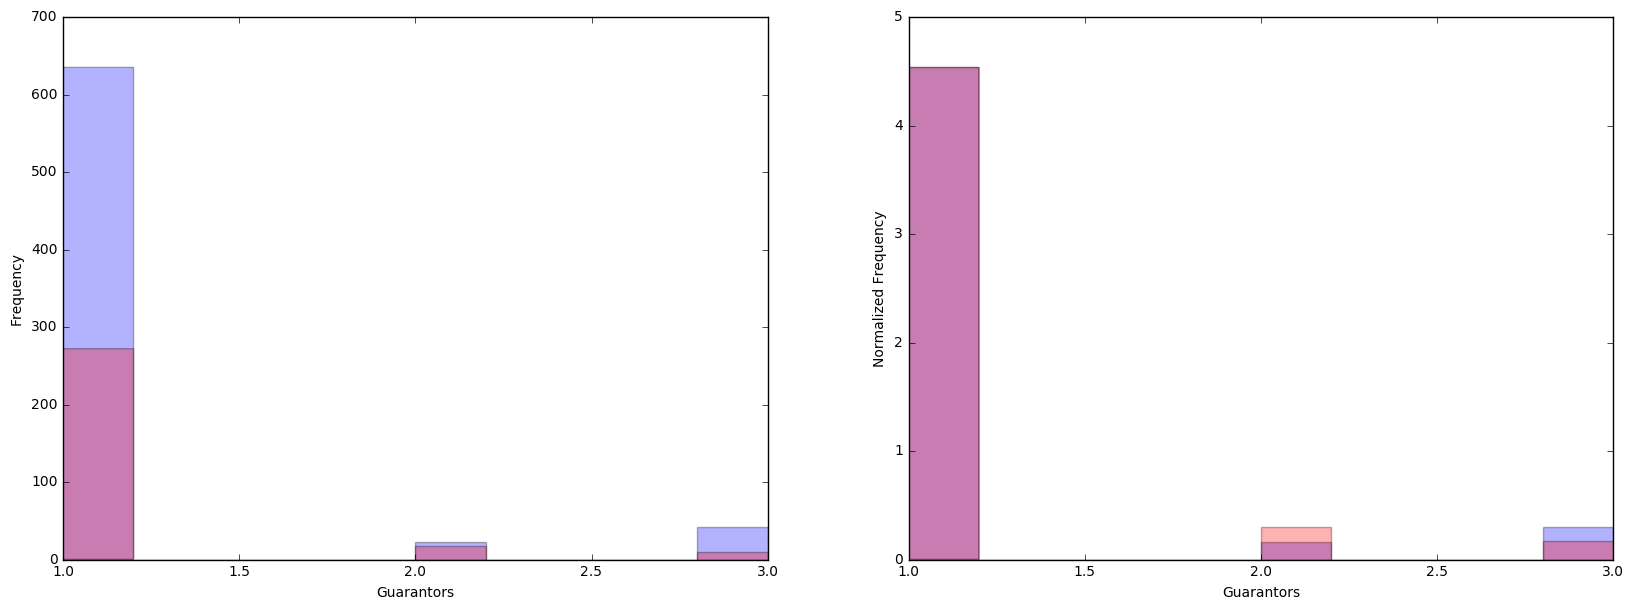

In [173]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Guarantors'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Guarantors'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Guarantors'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Guarantors'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Guarantors")
ax[1].set_xlabel("Guarantors")
ax[1].set_ylabel("Normalized Frequency")

## Effect of "Duration in Current address" on Response

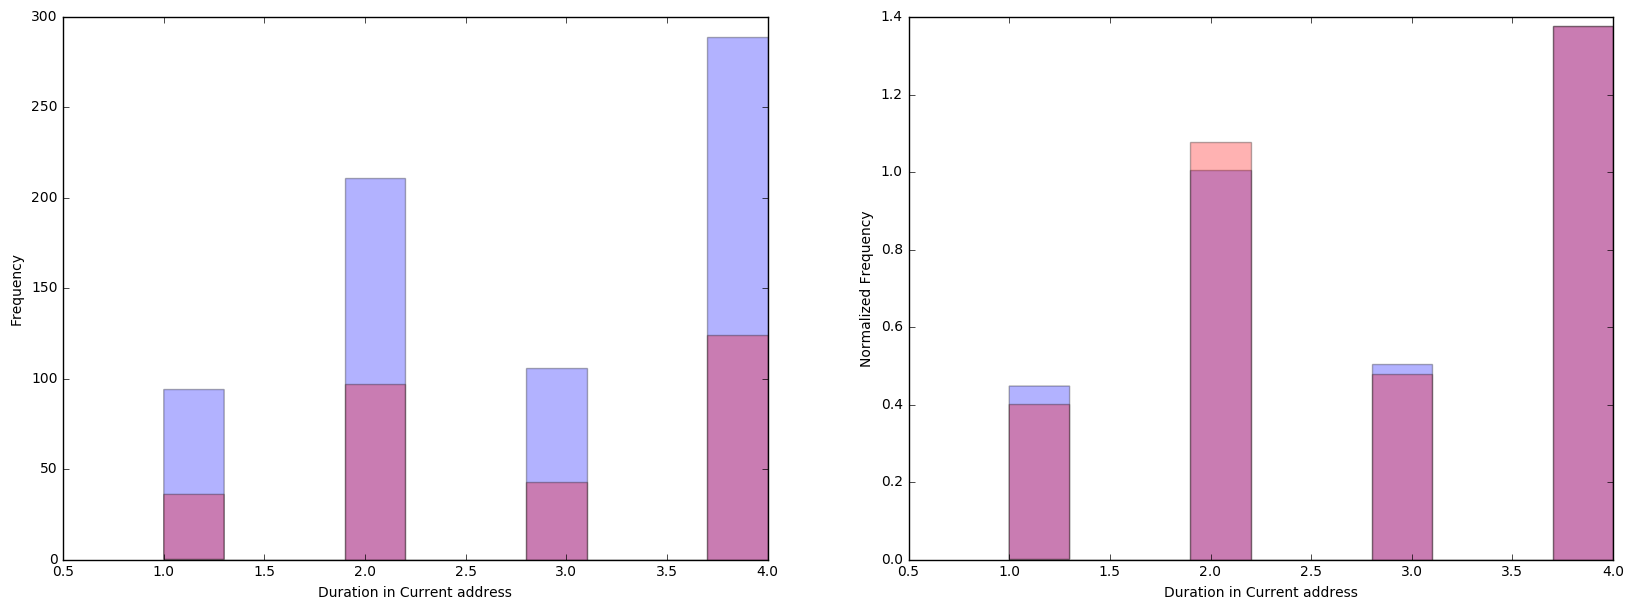

In [174]:

fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Duration in Current address'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Duration in Current address'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Duration in Current address'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Duration in Current address'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Duration in Current address")
ax[1].set_xlabel("Duration in Current address")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "Most valuable available asset" on Response

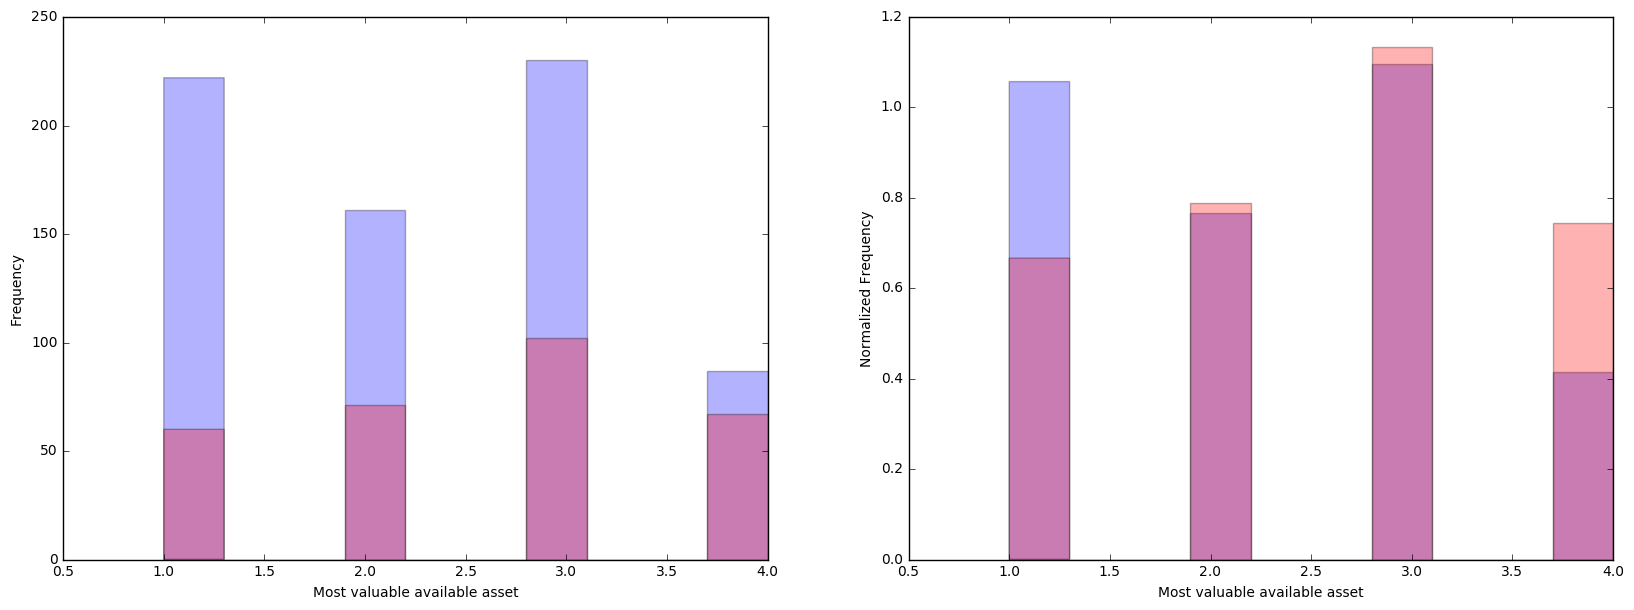

In [176]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Most valuable available asset'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Most valuable available asset'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Most valuable available asset'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Most valuable available asset'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Most valuable available asset")
ax[1].set_xlabel("Most valuable available asset")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "Concurrent Credits" on Response

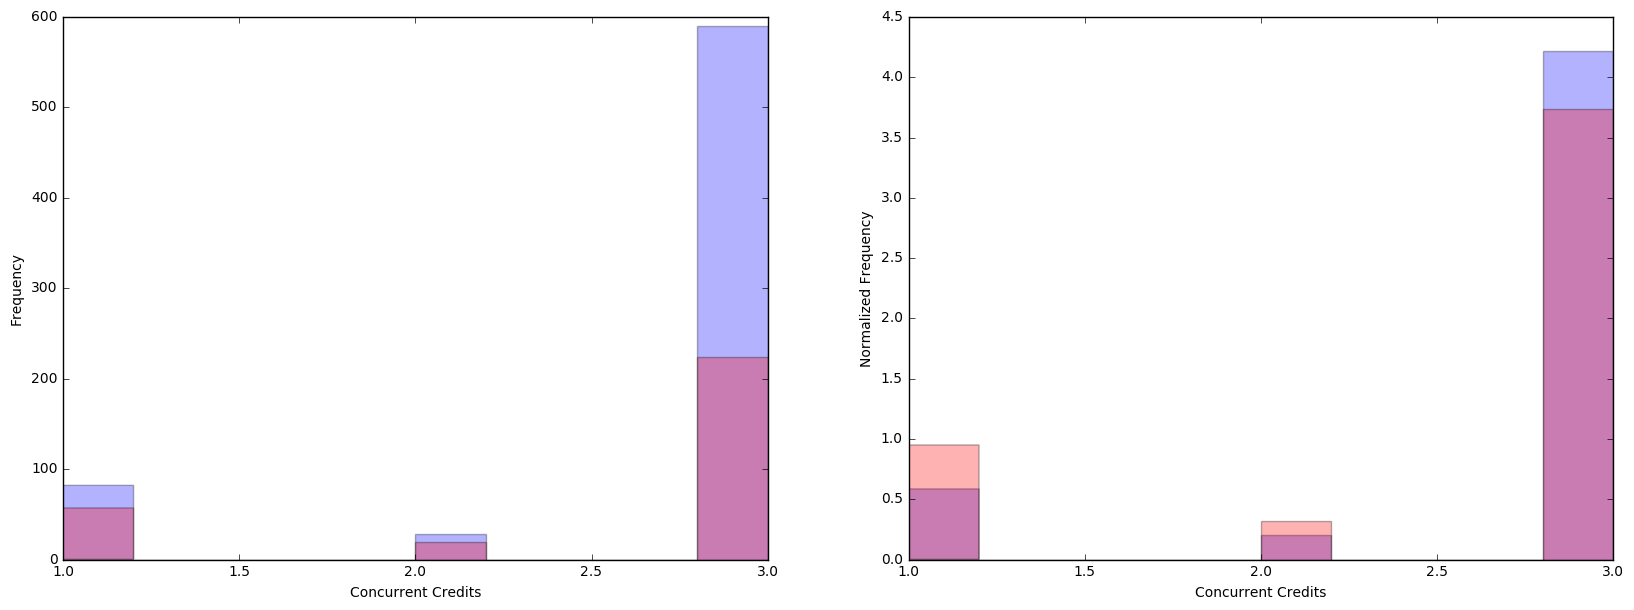

In [177]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Concurrent Credits'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Concurrent Credits'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Concurrent Credits'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Concurrent Credits'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Concurrent Credits")
ax[1].set_xlabel("Concurrent Credits")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "Type of apartment" on Response

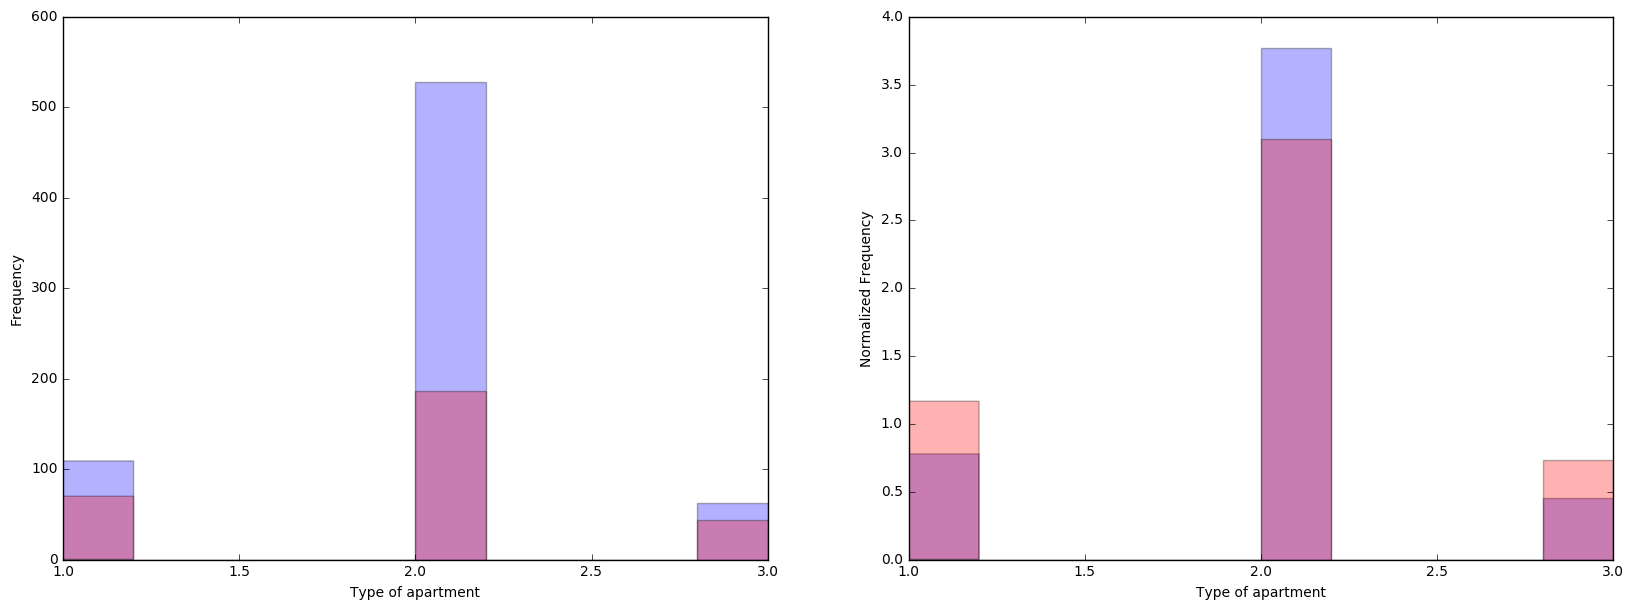

In [178]:

fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Type of apartment'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Type of apartment'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Type of apartment'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Type of apartment'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Type of apartment")
ax[1].set_xlabel("Type of apartment")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "No of Credits at this Bank" on Response

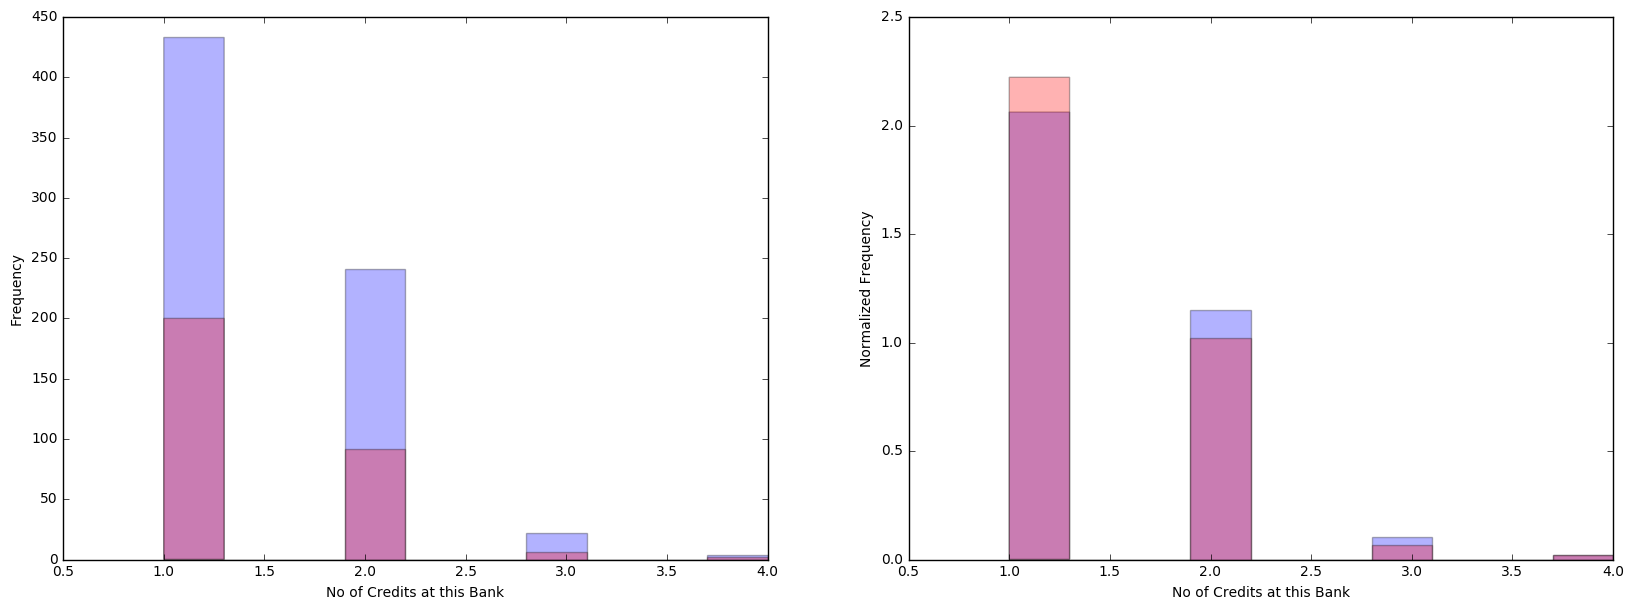

In [179]:


fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['No of Credits at this Bank'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['No of Credits at this Bank'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['No of Credits at this Bank'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['No of Credits at this Bank'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("No of Credits at this Bank")
ax[1].set_xlabel("No of Credits at this Bank")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "Occupation" on Response

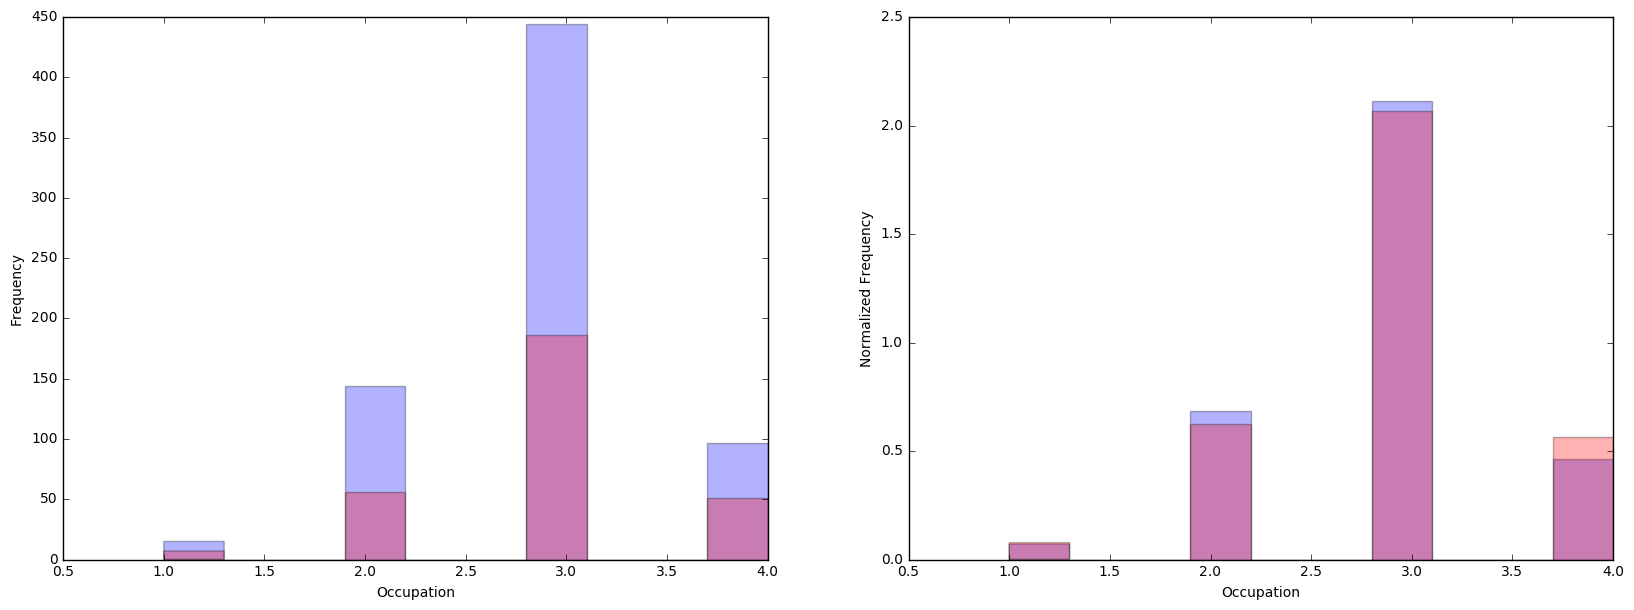

In [181]:
fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Occupation'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Occupation'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Occupation'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Occupation'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Occupation")
ax[1].set_xlabel("Occupation")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "No of Dependents" on Response

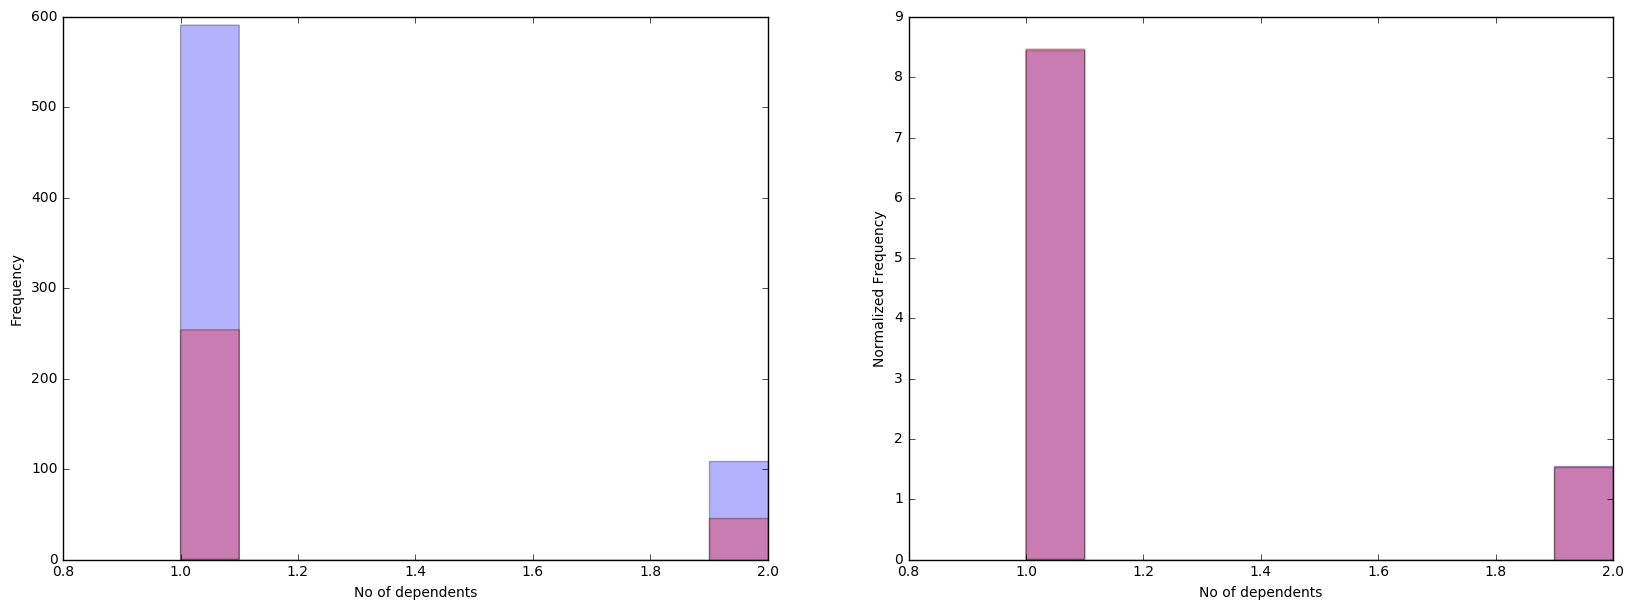

In [182]:

fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['No of dependents'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['No of dependents'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['No of dependents'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['No of dependents'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("No of dependents")
ax[1].set_xlabel("No of dependents")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "Telephone" on Response

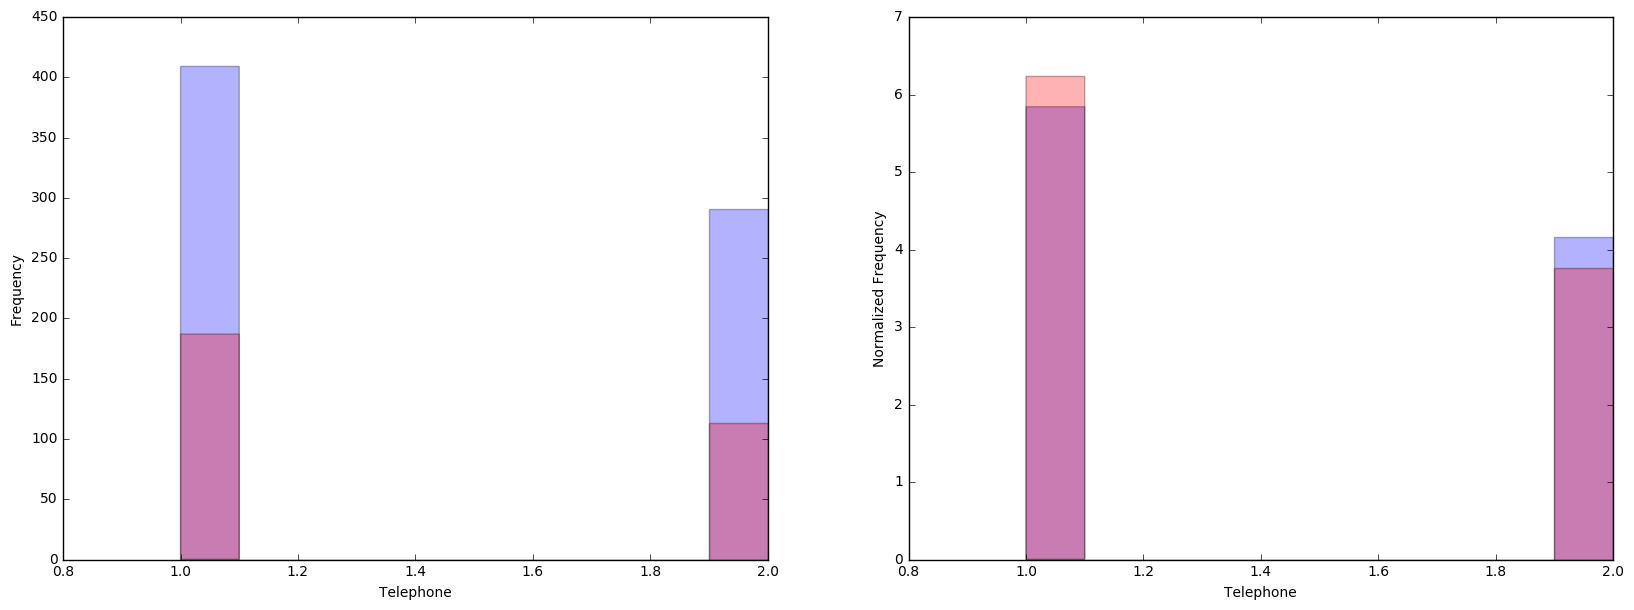

In [183]:

fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Telephone'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Telephone'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Telephone'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Telephone'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Telephone")
ax[1].set_xlabel("Telephone")
ax[1].set_ylabel("Normalized Frequency")


## Effect of "Foreign Worker" on Response

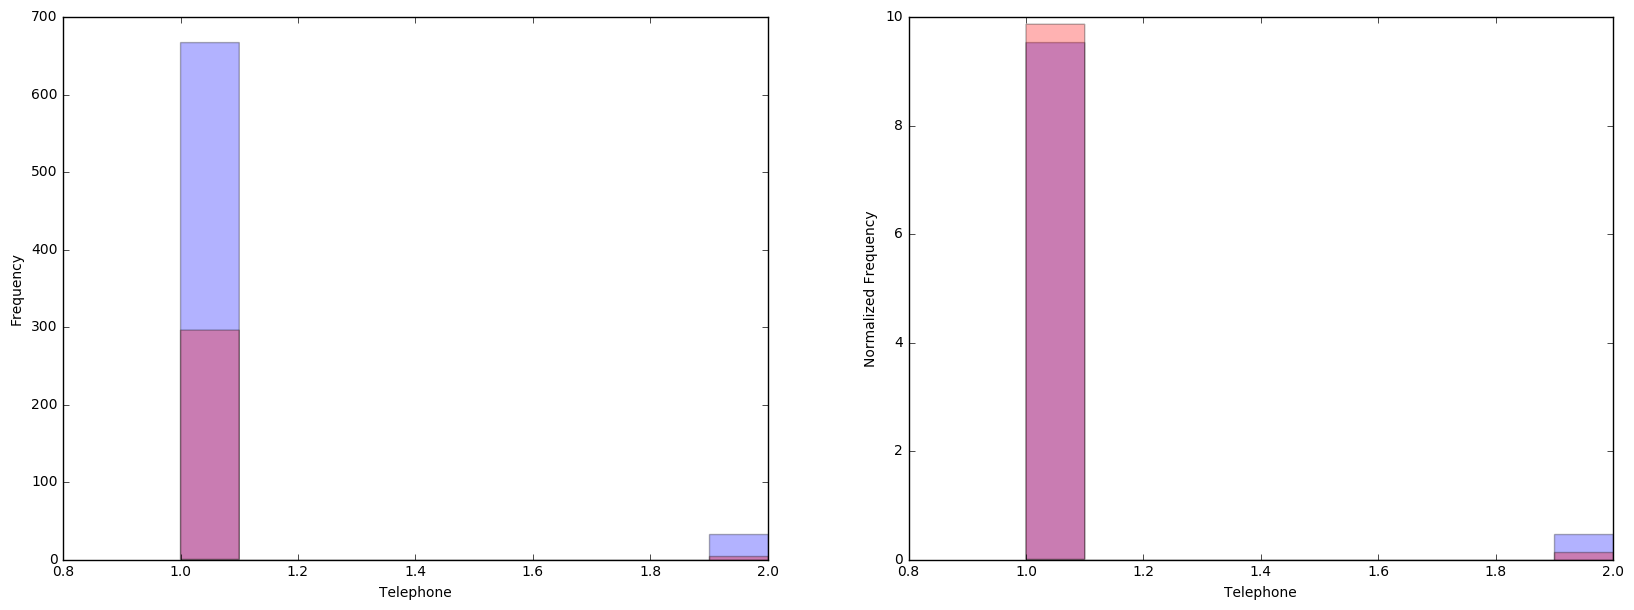

In [113]:

fig,ax = plt.subplots(1,2,figsize = (20,7))
df[df['Creditability']==1]['Foreign Worker'].plot(kind = 'hist',ax=ax[0],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Foreign Worker'].plot(kind = 'hist',ax=ax[0],label="0",color='r',alpha=0.3)
df[df['Creditability']==1]['Foreign Worker'].plot(kind = 'hist',normed=1,ax=ax[1],label="1",color='b',alpha=0.3)
df[df['Creditability']==0]['Foreign Worker'].plot(kind = 'hist',normed=1,ax=ax[1],label="0",color='r',alpha=0.3)
ax[0].set_xlabel("Telephone")
ax[1].set_xlabel("Telephone")
ax[1].set_ylabel("Normalized Frequency")
